#                         Tanzania Mobile Money
<img src='mpesa.jpg' alt='mpesa logo'>

Mobile money seems to be very popular in East Africa. Billions of dollars are transacted each year through mobile money services like Mpesa. People pay for good and services as well as their utility bills with it.

In this project I will analyse the demographics of over 7000 mobile money users in Tanzania and dig in for insights.

# 1. Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [1]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import folium
from folium.plugins import MarkerCluster

In [2]:
df_mobile= pd.read_csv('training.csv')

In [3]:
#column income. sums up how many income types a person has
df_mobile['income']= df_mobile.loc[:, 'Q8_1': 'Q8_11'].sum(axis=1, skipna=True)

#df_mobile.gender=df_mobile.gender.map(number_to_word)



Rename column names so I can work better with them

In [4]:
df_mobile = df_mobile.rename({'Q1': 'age', 'Q2': 'gender',
                              'Q3':'marital_status', 'Q4':'highest_education',
                              'Q5':'land_ownership', 'Q6':'title_deed',
                              'Q7':'own_phone', 'Q8_1':'salaries_wages',
                              'Q8_2':'selling_produce', 'Q8_3':'selling_services', 
                              'Q8_4':'piece_job', 'Q8_5':'rental_income',
                              'Q8_6':'interest_earned','Q8_7':'pension',
                              'Q8_8':'social_grant', 'Q8_9':'pocket_money',
                              'Q8_10':'someone_pays', 'Q8_11':'other', 
                              'Q9':'employer_for_employed', 'Q10':'what_you_sell', 
                              'Q11':'service_you_provide', 'Q12':'sent_money_in_12_months',
                              'Q13':'when_last_send_money','Q14':'recieved_money_in_12_months',
                              'Q15':'when_last_recieve_money','Q16':'how_often_purchase_mobilemoney',
                              'Q17':'how_often_pay_bills_with_mm','Q18':'literacy_Kiswhahili',
                              'Q19':'literacy_english'}, axis='columns')


Validate the data

In [5]:
def check_range(num, lower, upper, col):
    if num >= lower and num<= upper:
        return True
    else:
        print(f'{num} is out of range in column {col}')
        #raise ValueError(f'number is out of range in {col}.')
    
def check_int(num):
    try:
        int(num)
    except:
        raise ValueError(f'{num} is not an integer.')
        

In [6]:
params= {
    'ID': [0, 100000],
    'age':[10, 120],
    'gender':[1,2],
    'marital_status': [1, 4],
    'highest_education':[1, 7],
    'land_ownership': [1,6],
    'title_deed':[1,2],
    'own_phone': [1,2], 
    'salaries_wages': [0,1],
    'selling_produce': [0,1],
    'selling_services': [0,1],
    'piece_job': [0,1],
    'rental_income': [0,1],
    'interest_earned': [0,1],
    'pension': [0,1],
    'social_grant': [0,1],
    'pocket_money': [0,1],
    'someone_pays': [0,1],
    'other': [0,1],
    'employer_for_employed':[-1, 7],
    'what_you_sell':[-1,10],
    'service_you_provide':[-1, 12],
    'sent_money_in_12_months':[1, 2],
    'when_last_send_money': [-1 ,6],
    'recieved_money_in_12_months': [1,2],
    'when_last_recieve_money':[-1, 6],
    'how_often_purchase_mobilemoney':[-1,5],
    'how_often_pay_bills_with_mm':[-1,5],
    'literacy_Kiswhahili': [1, 5],
    'literacy_english': [1, 5],
    'Latitude':[-90, 90], 
    'Longitude':[-180, 180],
    'mobile_money':[0,1],
    'savings':[0,1],
    'borrowing':[0,1],
    'insurance':[0,1],
    'mobile_money_classification':[0,3],
    'income':[0,11]
}
def get_value(data):
    
    for col in data.columns:
        if col=='ID':
            duplicates= data[col].duplicated().sum()
            if duplicates>0:
                print(f'There are {duplicates} duplicates found in the unique identifier ID column. ')
        for value in data[f'{col}']:
            check_int(value)
            check_range(value, params[col][0], params[col][1], col )
        
            
get_value(df_mobile)

8 is out of range in column highest_education
8 is out of range in column highest_education


In [7]:
number_to_word= {
    0: 'no_mm',
    1:'no_mm',
    2:'mm_only',
    3:'mm_plus'
}
df_mobile['my_class']=df_mobile.mobile_money_classification.map(number_to_word)

df_income= df_mobile[['ID','age','gender', 'marital_status', 'title_deed', 
                      'how_often_purchase_mobilemoney','how_often_pay_bills_with_mm','salaries_wages',
                      'selling_produce', 'selling_services',
       'piece_job', 'rental_income', 'interest_earned', 'pension',
       'social_grant', 'pocket_money', 'someone_pays', 'other', 'highest_education', 'mobile_money', 'Latitude', 'Longitude',
                     'mobile_money_classification', 'my_class']]


# 2. Get basic descriptive statistics for the dataset.

In [8]:
df_mobile.describe()

,ID,age,gender,marital_status,highest_education,land_ownership,title_deed,own_phone,salaries_wages,selling_produce,...,literacy_Kiswhahili,literacy_english,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification,income
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267,1.340992
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955,0.550577
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000


# 3. Graphs to visualise financial services in Tanzania

In [9]:
number_to_word= {
    1: 'male',
    2:'female'
}
df_mobile.gender=df_mobile.gender.map(number_to_word)


In [10]:
no_mm= df_mobile[(df_mobile.mobile_money_classification==0)|(df_mobile.mobile_money_classification==1)]
mm_only=df_mobile[df_mobile.mobile_money_classification==2]
mm_plus=df_mobile[df_mobile.mobile_money_classification==3]

### financial service accessed vs age

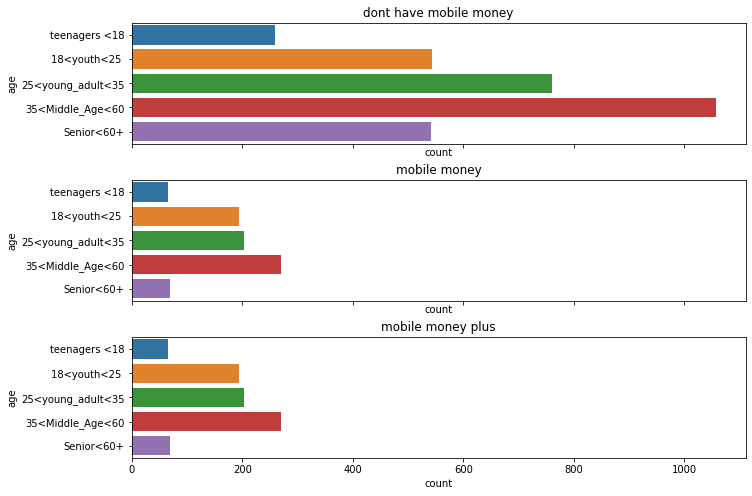

In [11]:
fig, axes= plt.subplots(3, 1, figsize=[11, 8], sharex= True)

bins= [12, 18, 25, 35, 60, 100]
group_names= ['teenagers <18', '18<youth<25 ', '25<young_adult<35', '35<Middle_Age<60', 'Senior<60+']

cats_no= pd.cut(no_mm.age, bins, labels= group_names)
sns.countplot(y=cats_no, ax= axes[0]).set_title('dont have mobile money')

cats_only= pd.cut(mm_only.age, bins, labels= group_names)
sns.countplot(y=cats_only, ax= axes[1]).set_title('mobile money')

cats_mm_plus= pd.cut(mm_plus.age, bins, labels= group_names)
sns.countplot(y=cats_only, ax= axes[2]).set_title('mobile money plus')


plt.subplots_adjust(wspace = 0.8 )
plt.subplots_adjust(hspace = 0.3 )

Just by looking at this graph, it is easy to see that most Tanzanians do not use mobile money at all. But of those who have at least mobile money, we can see that Middle aged adults use it the most. This is most likely because they are at their prime of economic activity.

### Financial services vs Marital status


In [12]:
df_income_id= df_income.ID.drop_duplicates()

In [13]:
number_to_word={
    1: 'married',
    2: 'divorced',
    3: 'widowed',
    4: 'single'
    
}

df_income['marital_status']= df_income['marital_status'].map(number_to_word)
df_mobile['marital_status']= df_mobile['marital_status'].map(number_to_word)


/home/masai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


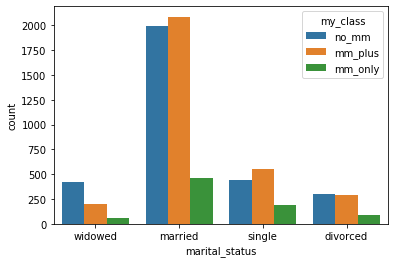

In [14]:
sns.countplot(x='marital_status', hue='my_class', data=df_mobile)

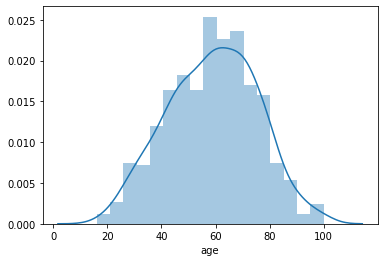

In [15]:
widowers= df_mobile[df_mobile.marital_status=='widowed']
sns.distplot(widowers.age)

Married people are the most prevelant in our data. Roughly 64% of the respondents are married. But they mostly have mobile money at least one other financial service. This is because they are more likely to be better off financially to have products such as insurance, loans, etc.

widowers mostly do not have mobile money. This might be becuase they tend to be older citizens who are born before technology. The mean age of widowers is around 60 years. Since they are widowed, they do not recieve money from their partners no more , which reduces the need for using mobile money.

### financial vs land ownership
measured by title deed.

In [16]:
number_to_word= {
    1: 'land_owner',
    2:'not_land_owner'
}
df_mobile['title_deed']= df_mobile.title_deed.map(number_to_word)

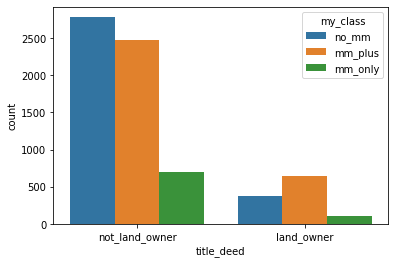

In [17]:
sns.countplot(df_mobile.title_deed, hue='my_class', data=df_mobile)
plt.show()

For the most part, Tanzanians do not have any form of title deed to show. A person without mobile money is more likely to be without any land ownership than the other two categories.
People who have mobile money and at least one other financial service are more likely to have a title deed. This may be like home insurance, crop insurance or mortgage bonds.

In [18]:
'''
df_income= df_mobile[['ID','age','gender', 'marital_status', 'title_deed', 'how_often_purchase_mobilemoney','salaries_wages', 'selling_produce', 'selling_services',
       'piece_job', 'rental_income', 'interest_earned', 'pension',
       'social_grant', 'pocket_money', 'someone_pays', 'other', 'mobile_money', 'Latitude', 'Longitude']]
'''
df_income= pd.melt(df_income, id_vars=['ID','age','gender','marital_status', 'title_deed','Latitude', 'Longitude','mobile_money', 'highest_education', 'how_often_purchase_mobilemoney', 'how_often_pay_bills_with_mm', 'my_class', 'mobile_money_classification'], var_name= 'income_type', value_name='income_value')


In [19]:
bool_to_word= {
    1:'yes',
    0:'no'
}
df_income['income_value']= df_income.income_value.map(bool_to_word)

In [20]:
mobile_to_word= {
    1:'yes',
    0:'no'
}
df_income['mobile_money']= df_income.mobile_money.map(bool_to_word)

In [21]:
df_income_all= df_income[df_income.income_value=='yes']
df_income_no= df_income_all[df_income_all.mobile_money==0]
df_income_mm= df_income_all[df_income_all.mobile_money==1]


In [22]:
df_income_all.income_type.value_counts()

selling_produce     4470
piece_job           2393
pocket_money        1112
salaries_wages       441
selling_services     412
someone_pays         410
social_grant         131
rental_income         67
interest_earned       34
pension               34
other                  9
Name: income_type, dtype: int64

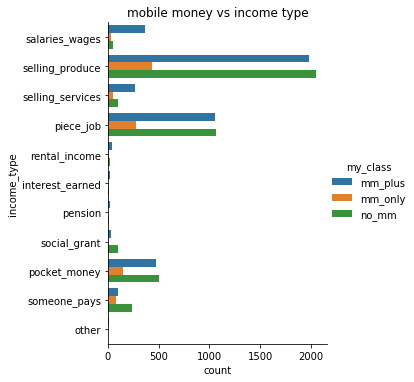

In [23]:

sns.catplot(hue='my_class', y='income_type', data=df_income_all, kind='count')
plt.title('mobile money vs income type')
plt.show()

From the graph above, we can see that the vast majority of Tanzanians sell produce for a living. Most of these people do not have mobile money. They are closely followed by produce sellers who have mobile money and at least one financial service. 
The second significant income type is the piece job. They use mobile money and at least one other financial service just as much as they do not have mobile money at all.

Other income types are fairly insignificant.

# 4. Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

### Frequency vs gender

In [24]:
number_to_word= {
    -1: 'NA',
    1: 'Never',
    2: 'Daily',
    3: 'Weekly',
    4: 'Monthly',
    5: 'Less than monthly'
}
df_mobile['how_often_purchase_mobilemoney']= df_income['how_often_purchase_mobilemoney'].map(number_to_word)

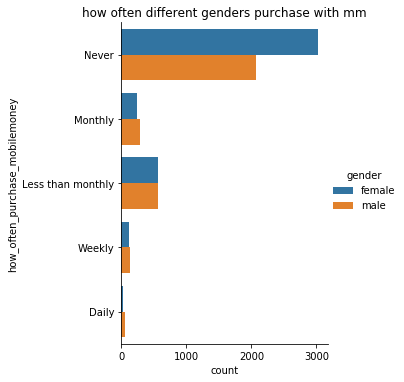

In [46]:
sns.catplot(hue='gender', y='how_often_purchase_mobilemoney', data=df_mobile, kind='count')
plt.title('how often different genders purchase with mm')
plt.show()

Most of the females in the data, agree to have never used mobile money compared to their male counterparts. Males start to dominate the use of mobile money from monthly usage down to daily usage. 

### frequency vs age

In [26]:
def to_age_group(age):
    if age<=18:
        return 'teenager'
    elif age >18 and age<=25:
        return 'youth'
    elif age>25 and age<=35:
        return 'young adult'
    elif age >35 and age<=60:
        return 'midddle age'
    else:
        return 'senior'

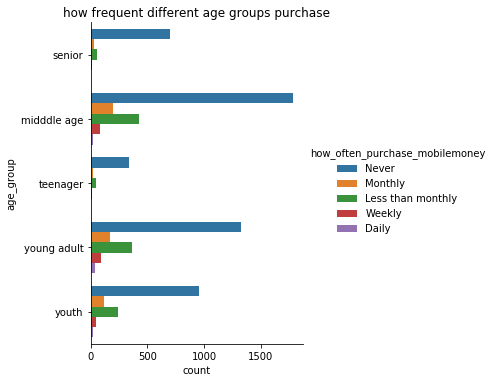

In [27]:

df_mobile['age_group']= df_mobile.age.apply(to_age_group)
sns.catplot(hue='how_often_purchase_mobilemoney', y='age_group', data=df_mobile, kind='count')
plt.title('how frequent different age groups purchase')
plt.show()

Throughout all the data, one trend is prevelant. Most people simply never purchase with mobile money at this point. Of those who do, middle aged and young adults agree to purchasing less than monthly using mobile money, which itself is very infrequent.

### frquency vs marital status

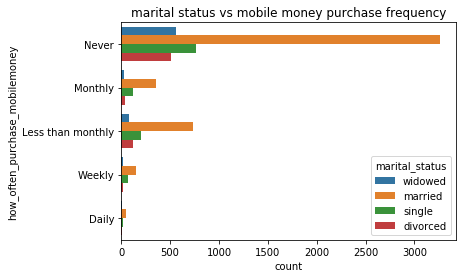

In [28]:
sns.countplot(hue='marital_status', y='how_often_purchase_mobilemoney', data=df_mobile)
plt.title('marital status vs mobile money purchase frequency')
plt.show()

Since most of the people in our data are married, its not a surprise that majority of the people who never use mm are married. 
Married people also use mm more frequently than others, as they may be sending money to kids, running their businesses with spouses, etc. 
Single people follow suit, as they tend to be younger and recieve pocket money. They are also more likely to be tech savvy as they are younger and born after tehcnology.

### frequency vs land

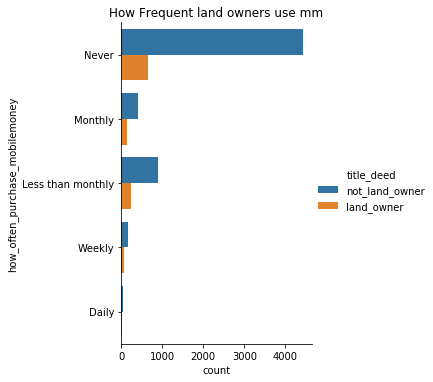

In [29]:
sns.catplot(hue='title_deed', y='how_often_purchase_mobilemoney', data=df_mobile
            , kind='count')
plt.title('How Frequent land owners use mm')
plt.show()

peope who do not own land happen to use mobile money more than their counterpaarts who have some form of title deed. This may be because they have to pay rent and land may be owned by people who are older as land may be expensive, so it may take a lifetime to acquire.
Some people without land may be farming on their parents' land.

### frequeny vs income type

In [30]:
number_to_word= {
    -1: 'NA',
    1: 'Never',
    2: 'Daily',
    3: 'Weekly',
    4: 'Monthly',
    5: 'Less than monthly'
}
df_income_all['how_often_purchase_mobilemoney']= df_income_all['how_often_purchase_mobilemoney'].map(number_to_word)

/home/masai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


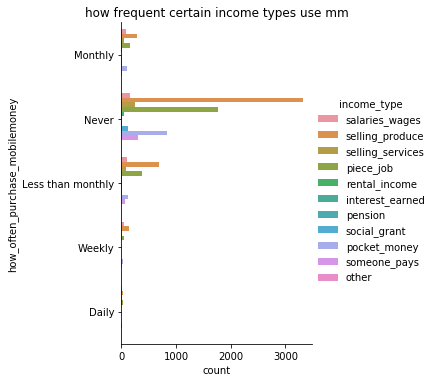

In [31]:
sns.catplot(hue='income_type', y='how_often_purchase_mobilemoney', data=df_income_all, kind='count')
plt.title('how frequent certain income types use mm')
plt.show()

People who sell produce happen to use mobile money more frequently that any other group. This is because they buy and sell goods and services frequently in the markets.

In [32]:
number_to_word= {
    -1: 'NA',
    1: 'Never',
    2: 'Daily',
    3: 'Weekly',
    4: 'Monthly',
    5: 'Less than monthly'
}
df_income_all['how_often_pay_bills_with_mm']= df_income_all['how_often_pay_bills_with_mm'].map(number_to_word)

/home/masai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


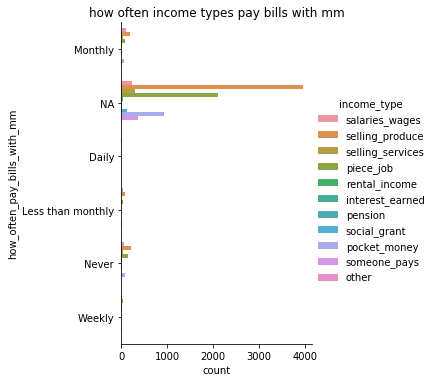

In [49]:
sns.catplot(hue='income_type', y='how_often_pay_bills_with_mm', data=df_income_all, kind='count')
plt.title('how often income types pay bills with mm')
plt.show()


Predominantly, very few people actually pay their bills using mobile money. This may be because of lack of knowledge, interest or mobile money may simply not be accepted at such institutions.

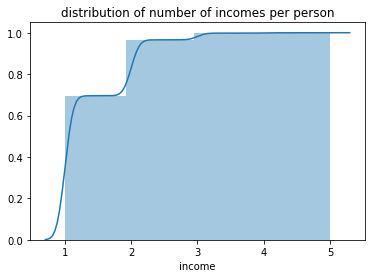

In [50]:
income_values= df_mobile.income.value_counts()
#plt.hist(df_mobile.income,cumulative=True, density=True)
sns.distplot(df_mobile.income, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
plt.title('distribution of number of incomes per person')
plt.show()



from the cumulative distribution graph plotted above, it is evident that roughly 70% of the people in our data rely on a single income source. 97% have less than 2 sources of income.

In [35]:
multi_income= df_mobile[df_mobile.income>=2]
multi_income.shape

(2159, 40)

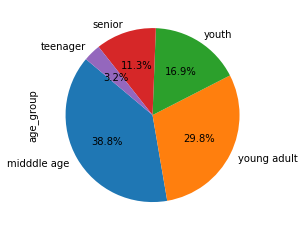

In [36]:
multi_income.age_group.value_counts().plot(kind='pie', startangle=140, autopct='%1.1f%%')
#plt.pie(multi_income.age_group.value_counts(),startangle=140)
plt.show()

Of the 30% of Tanzanians who have 2 or more income sources, middle aged adults as well as young adults seem to be in the lead. This is expected as they are at their prime as active participants in the economy. They probably have children to feed so they try by all means to have more than one income source.

In [37]:
df_mobile.age_group.value_counts()

midddle age    2508
young adult    1989
youth          1380
senior          802
teenager        415
Name: age_group, dtype: int64

## education level vs income

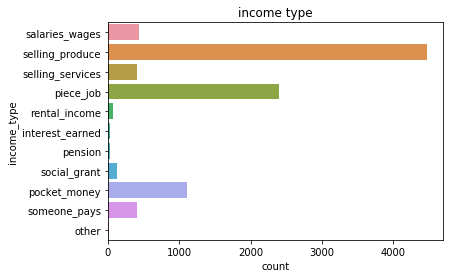

In [51]:
df_income_produce= df_income_all[(df_income_all.income_type=='selling_produce') & (df_income_all.mobile_money=='yes')]
sns.countplot(y=df_income_all.income_type)
plt.title('income type')
plt.show()

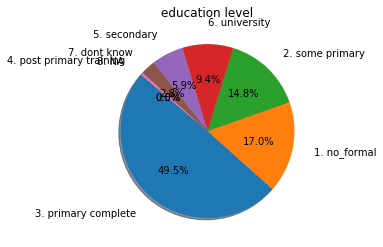

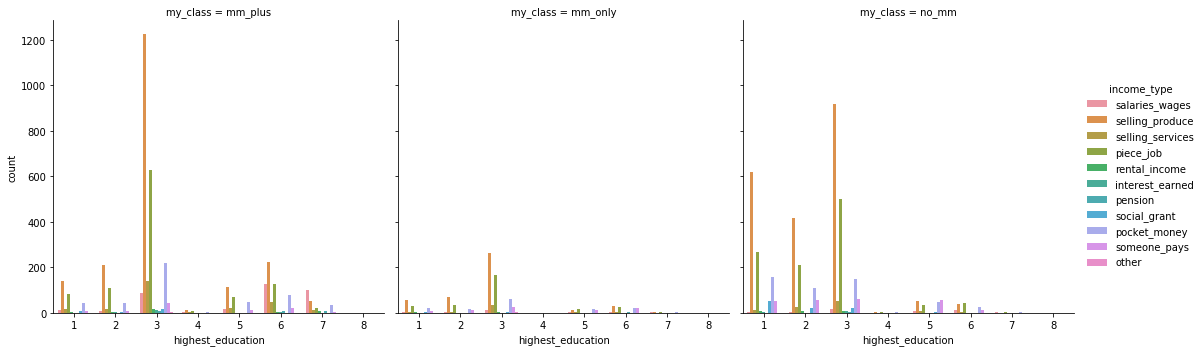

In [58]:
labels=['3. primary complete', '1. no_formal', '2. some primary', '6. university', '5. secondary', '7. dont know', '4. post primary training', '8. NA']
plt.pie(df_income_all.highest_education.value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=140, labeldistance=1.25)
plt.title('education level')
plt.show()

sns.catplot(x='highest_education', hue='income_type', col='my_class',data=df_income_all, kind='count')
plt.show()

About half of the people in Tanzania only have a primary level education. Of these people, the vast majority of them sell produce for a living.

Income from agricultural produce is seasonal in nature. Bananas do not grow all year round. This may cause some people to actually have other sources of income to cover up for the down time during seasonal changes. Truth be told, Tanzanians are hustlers.

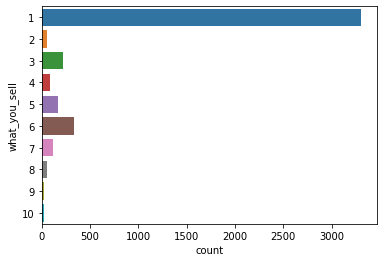

In [57]:
sns.countplot(y=df_mobile[df_mobile.what_you_sell!=-1].what_you_sell)
plt.show()

The plot above further proves that Tanzanians, for the most part rely on selling crops to get income for their families. It is orders of magnitude far greater than any other source of income.

# 5. Create a map to visually explore geographic distribution of mobile services coverage with respect to type of income.

In [41]:
m= folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(df_income_produce.Latitude, df_income_produce.Longitude):
    folium.Marker(location = [lat, long]).add_to(marker_cluster)

m




most people get income primarily from selling produce that they personally grow. It is thus no surprise that they are for the most part not located in major cities such as Dar es Salaam.

Farmlands are in rural areas.

In [42]:
df_income_piecejob= df_income_all[(df_income_all.income_type=='piece_job') & (df_income_all.mobile_money=='yes')]

In [43]:
m= folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(df_income_piecejob.Latitude, df_income_piecejob.Longitude):
    folium.Marker(location = [lat, long]).add_to(marker_cluster)

m


Dar es Salaam is a major city like Johannesburg in Tanzania. It has a population of over 4,365 million people according to 2012 Sensus. It is therefore expected that most people who get piece jobs would be located in such a city. This is evident when you zoom in. It has the most concentrated data points on the map.


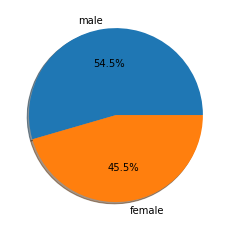

In [44]:
plt.pie(df_income_produce.gender.value_counts(), labels=['male', 'female'], autopct='%1.1f%%', shadow=True)
plt.show()



Despite the fact that our dataset contains more females than males, males seem to be selling more produce than their female counterparts. 55% of the sellers are male whilst only 45% of them are female.

# 6. What can you conclude about use of financial services in Tanzania? Which demographic and geographic factors are associated with mobile money use?

Having analysed the dataframe of Tanzanian mobile money users containing 7094 records, it is clear that cash is still king. Majority of the people still do not use mobile money frequently to purchase and recieve funds. This means that there is still a long way to go as the market largely remains untapped.

More efforts need to be made to drive across the benefits of mobile money mainly targeted to the masses as we have seen that half of the people only have primary school level education. Since roughly 49% of Tanzanians sell agricultural produce for a living, having targeted incentives for them when they accept and make purchases in mobile money may allow for greater adoption.
Illiteracy is English mainly, is probably one of the greatest barries to the adoption of mobile money.


In terms of who uses mobie money, we have not realized any significant difference. Our data just contains more females than males. 

Young adults (aged 25-35) followed by middle aged adults(35-60) tend to be the most common users of mobile money since they have income.
People with a title deed are 9% more likely to have mobile money. Only 16% have some form of ownership proof of the land they live on.

geography
Most people in our data stay in the rural areas of the country. At first this was a surprise. But as we dug into the data we found that Tanzanians rely on primary agriculture and selling the produce for a living. It then made sense as you cannot really farm a lot in the major cities.


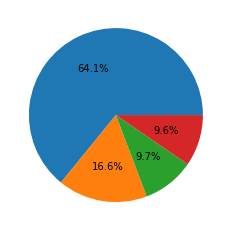

In [45]:
plt.pie(df_mobile.marital_status.value_counts(), autopct='%1.1f%%')
plt.show()